In [1]:
import numpy as np
import scipy
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [2]:
p = np.matrix([[1,0,0,0,0],
               [0.8,0.1,0.1,0,0],
               [0,0,0.8,0.2,0],
               [0,0,0.1,0.8,0.1],
               [0,0,0,0.1,0.9]])

p_eq = np.linalg.matrix_power(p,100000)

In [3]:
p

matrix([[1. , 0. , 0. , 0. , 0. ],
        [0.8, 0.1, 0.1, 0. , 0. ],
        [0. , 0. , 0.8, 0.2, 0. ],
        [0. , 0. , 0.1, 0.8, 0.1],
        [0. , 0. , 0. , 0.1, 0.9]])

(a)

There are 2 closed communicating classes:

$C_1 \in (A)$

$C_2 \in (C,D,E)$

(b)

Lily pad A is an absorbing state. You can't move to another state once you're there. 

$P(X_{n+1} = C|X_{n} = A) = 0$ and the expected time to hit lily pad C is infinite.

(c)

We need to compute $Var(T_c) = \mathbb{E}_D[T_c^2] - \mathbb{E}_D[T_c]^2$

For the second half of this equation, we can use first transition analysis to compute the expected hitting time of lily pad $D$ given that it started on $C$.


In [11]:
B = p[3:6,3:6]
I = np.identity(B.shape[0])
ones = np.ones(B.shape[0])

u = np.linalg.inv(I-B)@ones
B

matrix([[0.8, 0.1],
        [0.1, 0.9]])

In [12]:
u

matrix([[20., 30.]])

Then, we can set up a system of linear equations to compute the first half of the variance calculation:

$V_x = 1 + \sum_{y \in (D,E)} (v(y) + 2u(y))*P(X_1=y|X_0=x)$

v(D) = 1 + (.8D + .8(2u(d))) + (.1E + .1(2u(e))) = .8D + .2E + 39

v(E) = 1 + (.1D + .1(2u(d))) + (.9E + .9(2u(e))) = .1D + .9E + 59

In [57]:
a = np.matrix([39, 59])
var = np.linalg.inv(I-B)@a.T
var

matrix([[980.],
        [785.]])

Finally, we can compute $Var(T_c) = \mathbb{E}_D[T_c^2] - \mathbb{E}_D[T_c]^2$

$Var(T_c) = 980 - 400 = 580$

In [58]:
(var[0,0]-u[0,0]**2)

580.0000000000002

(d)

We can break up the markov chain into its closed communicating classes and transient state.

State A: We can expect the long run proportion of a bug in this state to be 100% if it started there. This is a closed communicating class.

State B: This is a transient state. We can expect the long run proportion of a bug in this state to be 0% because there is an 88.89% chance that it will move to state A, a 2.22% chance that it will move to state C, and a 4.44% chance that it will move to state D or E.

State C: We can expect the long run proportion of a bug in this state to be 20% because this is in a closed communicating class.

State D: We can expect the long run proportion of a bug in this state to be 40% because this is in a closed communicating class.

State E: We can expect the long run proportion of a bug in this state to be 40% because this is in a closed communicating class.

In [47]:
p_eq

matrix([[1.        , 0.        , 0.        , 0.        , 0.        ],
        [0.88888889, 0.        , 0.02222222, 0.04444444, 0.04444444],
        [0.        , 0.        , 0.2       , 0.4       , 0.4       ],
        [0.        , 0.        , 0.2       , 0.4       , 0.4       ],
        [0.        , 0.        , 0.2       , 0.4       , 0.4       ]])

(e)

The frog on lily pad E turns E into an absorbing state. We can compute the expected hitting time of the bug hitting lily pad E

In [16]:
p_frog = np.matrix([[1,0,0,0,0],
               [0.8,0.1,0.1,0,0],
               [0,0,0.8,0.2,0],
               [0,0,0.1,0.8,0.1],
               [0,0,0,0,1]])

B = p_frog[2:4,2:4]
I = np.identity(B.shape[0])
ones = np.ones(B.shape[0])

u = np.linalg.inv(I-B)@ones
u[0,0]

20.000000000000018

(f)

Infinite. Lily pad A is an absorbing state. The bug will never leave.

(a)

We can use FTA with a vector of our holding cost function to estimate the holding cost until first replenishment.

In [2]:
A=np.zeros((31,31))
#i is the initial number of items
for i in range(31):
    #j is the new number after decay
    for j in range(1,i+1):
        #i-j decayed out of i, with lambda=4
        prob=poisson.pmf(i-j,8)
        A[j][i]=prob
    A[0][i]=1-np.sum(A[:,i])
A=A.T

C=np.zeros((31,31))
#Do nothing if >=6
for i in range(6,31):
    C[i,i]=1
#Refill to 30 if < 6
C[30,0:6]=1
C = C.T

X = C@A

In [3]:
#a

B = X[6:31, 6:31]
I = np.identity(B.shape[0])
ones = np.ones(B.shape[0])

cost = [1 for x in range(6,31)]
j = 0
for i in cost:
    if j > 8:
        cost[j]=2
    j += 1
cost = np.matrix(cost)
    
u = np.linalg.inv(I-B)@cost.T
print('Holding Cost:', u[21])

Holding Cost: [[ 5.38618181]]


In [4]:
cost

matrix([[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2]])

In [5]:
u

matrix([[ 1.00033558],
        [ 1.00302108],
        [ 1.0137703 ],
        [ 1.04247335],
        [ 1.10003346],
        [ 1.19262298],
        [ 1.31739349],
        [ 1.4630082 ],
        [ 1.61468561],
        [ 2.76068523],
        [ 2.89739351],
        [ 3.0313802 ],
        [ 3.17724782],
        [ 3.35120301],
        [ 3.56301472],
        [ 3.81097288],
        [ 4.08292077],
        [ 4.36236542],
        [ 4.63562584],
        [ 4.8961484 ],
        [ 5.1446356 ],
        [ 5.38618181],
        [ 5.62665763],
        [ 5.87012511],
        [ 6.11794771]])

(b)

Below is a simulation of the variance computation where we find a 95% CI of the variance = $(1.4480, 1.6014)$

In [568]:
#b

A=np.zeros((31,31))
L=8
X0=27
s0=15
s=6
S=30
#i is the initial number of items
for i in range(31):
    for j in range(30,0,-1):
        #j is the new number of items
        if (j>i):
            A[j][i]=0
        else:
            A[j][i]=poisson.pmf(i-j,L)
    A[0][i]=1.0-np.sum(A[:,i])

totalholdingcosts=[]
#Run a simulation for statistics
for loop in range(1000):
    X=X0
    h=0
    while (X>=s): #while first replenish has not arrived
        h+=1
        if (X>s0): 
            h+=1
        init=np.zeros((31,))
        init[X]=1
        r=np.random.rand()
        prob=(A.dot(init.T))
        for newX in range(31):
            if r<np.sum(prob[:0+newX]):
                break
        X=newX #Now X is the new value after sales
    totalholdingcosts.append(h)
totalholdingcosts=np.array(totalholdingcosts)

print('Variance of Holding Cost: {}'.format(np.var(totalholdingcosts)))

Variance of Holding Cost: 1.524759


In [569]:
CI = scipy.stats.t.interval(0.95, len(totalholdingcosts)-1, 
                       loc=np.var(totalholdingcosts), 
                       scale=scipy.stats.sem(totalholdingcosts))

print('95% CI of Variance: ', CI)

95% CI of Variance:  (1.448094829937303, 1.6014231700626969)


(c)

We start at day $n$ with $X_n = 20$ items available for sale. That means that there's maximum 20 items that can be sold. We use our A matrix because we don't want to incorporate the restocking aspect of the system, i.e., it's quite possible that we can sell 20 items, but if we used the full system, the probability would be 0 that our supplies would ever fall below 6. Therefore, we only use the matrix of poisson distributions.

In [364]:
#c

rev_mat = A[20]
      
rev = 0
for i in range(0,rev_mat.shape[0]):
    rev += rev_mat[i]*3*(20-i)
print('Expected Revenue: ',rev)

Expected Revenue:  23.999567528571358


In [566]:
rev_vec = np.zeros(25)
x = 0
for i in range(6,31):
    rev_mat = A[i]
    rev = 0
    for j in range(0,31):
        rev += rev_mat[j]*3*(max(0,i-j))
    rev_vec[x] = rev
    x += 1

In [567]:
X_eq = np.linalg.matrix_power(X,10000)[6:31,6:31][1]

(d)

Again, we can run a simulation and derive a confidence interval $(19.9126, 20.8993)$ for the steady state revenue

In [559]:
revenues=[]
X=X0
#Simulation
for loop in range(1000):
    init=np.zeros((31,))
    init[X]=1
    r=np.random.rand()
    prob=(A.dot(init.T))
    for newX in range(31):
        if r<np.sum(prob[:0+newX]):
            break
    revenues.append((X-newX)*3)
    X=newX #Now X is the new value after sales
    if (X<s):
        X=30
print('Steady State Revenue : {}'.format(np.mean(revenues)))  

Steady State Revenue : 20.406


In [561]:
CI = scipy.stats.t.interval(0.95, len(revenues)-1, 
                       loc=np.mean(revenues), 
                       scale=scipy.stats.sem(revenues))

print('95% CI of Steady State Revenue: ', CI)

95% CI of Steady State Revenue:  (19.912618892268036, 20.899381107731962)


In [2]:
library(tidyverse, stats)

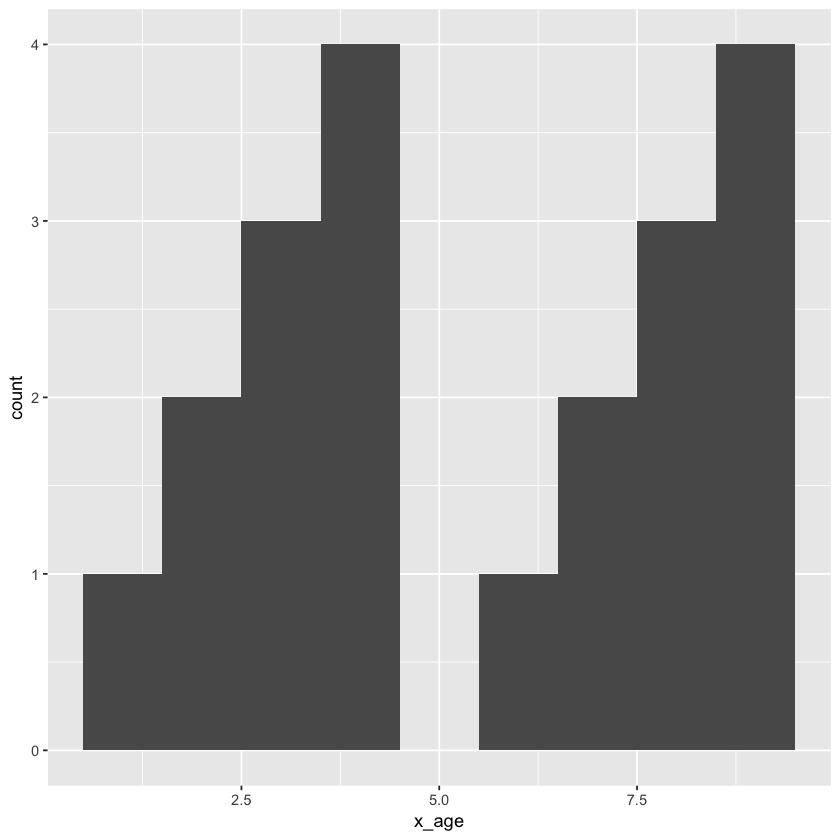

In [25]:
#a

x_age <- c(1,2,2,3,3,3,4,4,4,4,6,7,7,8,8,8,9,9,9,9)
ggplot(data = data.frame(x_age), aes(x = x_age, fill = x_age)) + 
        geom_histogram(bins = 9, alpha = 1)

(a)

We can use the PMF of $X_n: p_k$ in conjunction with the regenerative ratio to find a closed form solution for the equilibrium of $X_n$ such that our solution models the cycles that begin at 1

$\frac{\mathbb{E}_z[\mathbb{1}(X_n=x)]}{\mathbb{E}_z[\tau(z)]}$ ratio of the time in the cycle and the expectation of hitting time

where $\tau = min(n\geq 1: X_n = z)$ min time for $X$ to hit $z$

$=\mathbb{E}[\sum_{n=1}^{\tau_{z-1}}\mathbb{1}(X_n=x)]$

$=\mathbb{E}[\mathbb{1}(\tau_{0}\geq x)]$

$= \frac{\sum_{k=x}^{\infty}p_k}{\sum_{k=1}^{\infty}kp_k}$

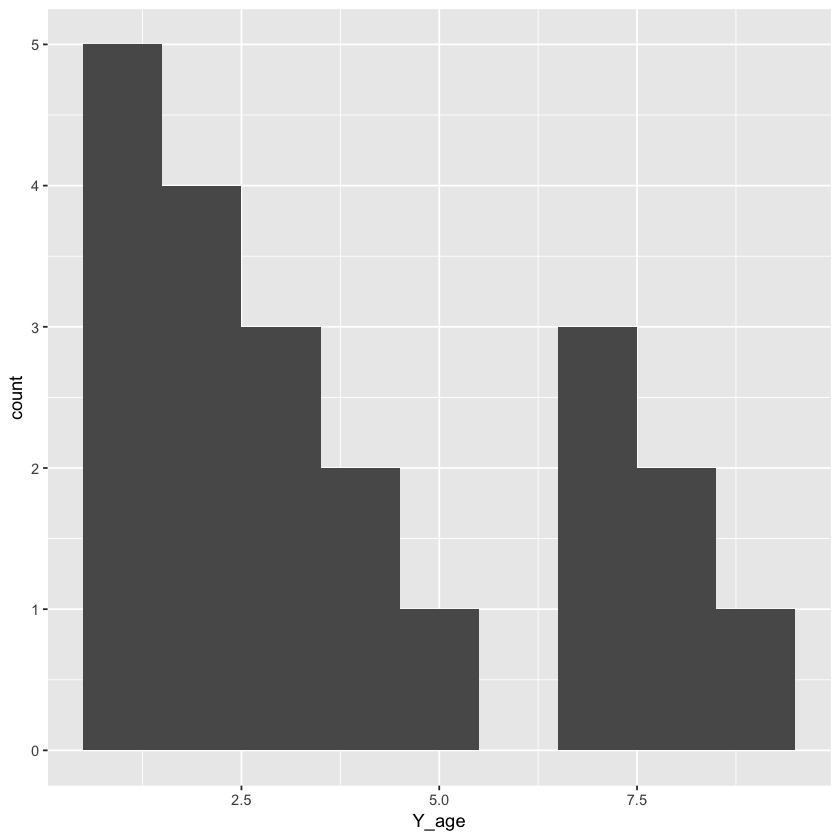

In [23]:
#b

Y_age <- c(1,1,1,1,1,2,2,2,2,3,3,3,4,4,5,7,7,7,8,8,9)
ggplot(data = data.frame(Y_age), aes(x = Y_age, fill = Y_age)) + 
        geom_histogram(bins = 9, alpha = 1)

(b)

We can model $Y_n$ such that the cycles start at 0 and decline. We find the same closed formula as above despite offsetting our starting and ending points by 1.

$=\mathbb{E}[\sum_{n=0}^{\tau_{z-1}}\mathbb{1}(X_n=x)]$

$=\mathbb{E}[\mathbb{1}(\tau_{0}\geq x)]$

$= \frac{\sum_{k=x}^{\infty}p_k}{\sum_{k=0}^{\infty}kp_k}$

(c)

For this problem, we set $p_k \sim Pois(\lambda=4)$

In [3]:
simulator <- function(n, prob)
{
    vec <- rep(0,1000)
    mean_vec <- rep(0,1000)
    for (i in 1:1000)
    {
        state <- rpois(1,4) #set initial state
        regen <- 1
        for (j in 1:n-1)
        {
            p <- dpois(state,4)/(1-sum(dpois(1:max(1,(state-1)),4)))
            q <- 1-p
            x <- which(rmultinom(1, 1, c(p,q))==1)
            if(x==2){state <- state + 1} 
            else
            {
                regen <- cbind(regen, state)
                state <- 1
            }

        }
        vec[i] = state #final state at time n
        mean_vec[i] = mean(cbind(regen,state)[-1])
    }
    if(prob=='a'){return(vec)}
    else{return(mean_vec)}
}

In [8]:
backup_simulator <- function(n, prob)
{
    vec <- rep(0,1000)
    mean_vec <- rep(0,1000)
    for (i in 1:1000)
    {
        state <- rpois(1,4) #set initial state
        regen <- 1
        for (j in 1:n-1)
        {
            q <- dpois(state,4)
            p <- 1-q
            x <- which(rmultinom(1, 1, c(p,q))==1)
            if(x==2){state <- state + 1} 
            else
            {
                regen <- cbind(regen, state)
                state <- 1
            }

        }
        vec[i] = state #final state at time n
        mean_vec[i] = mean(cbind(regen,state)[-1])
    }
    if(prob=='a'){return(vec)}
    else{return(mean_vec)}
}

In [66]:
#c

Age <- simulator(500,'a')

Selecting by n


Age,n
1,26
2,16
3,25
4,13
5,7
427,8
462,7
485,7
487,7
496,8


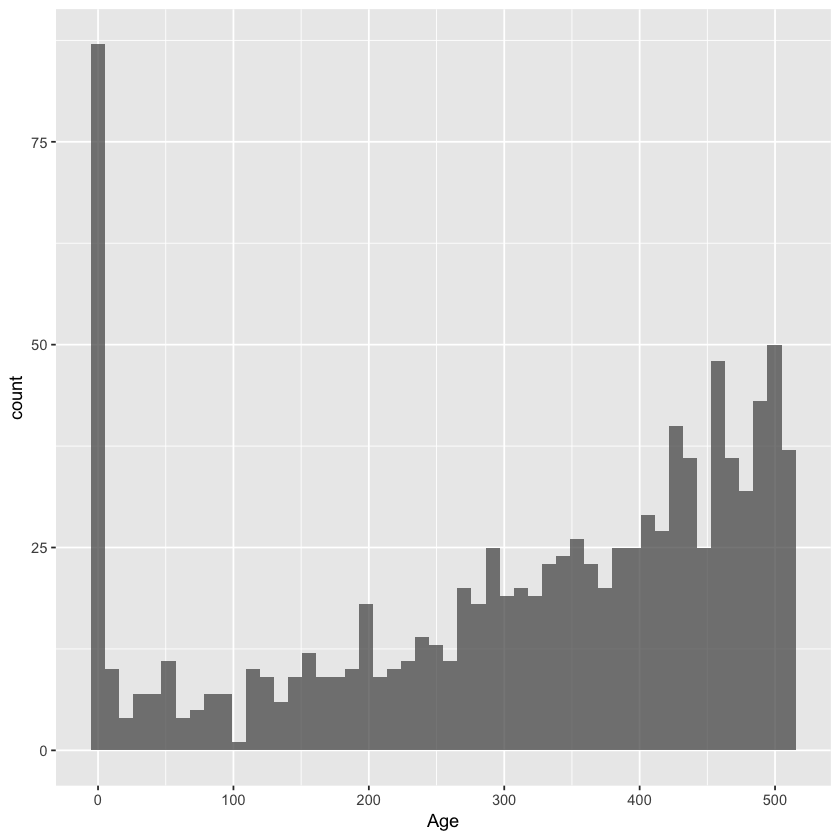

In [82]:
#c

data.frame(Age) %>% group_by(Age) %>% tally() %>% top_n(10)

ggplot(data = data.frame(Age), aes(x = Age, fill = Age)) + 
        geom_histogram(bins = 50, alpha = .75)

In [14]:
backup_Age <- backup_simulator(500,'a')

Selecting by n


backup_Age,n
1,925
2,66
3,3
4,5
5,1


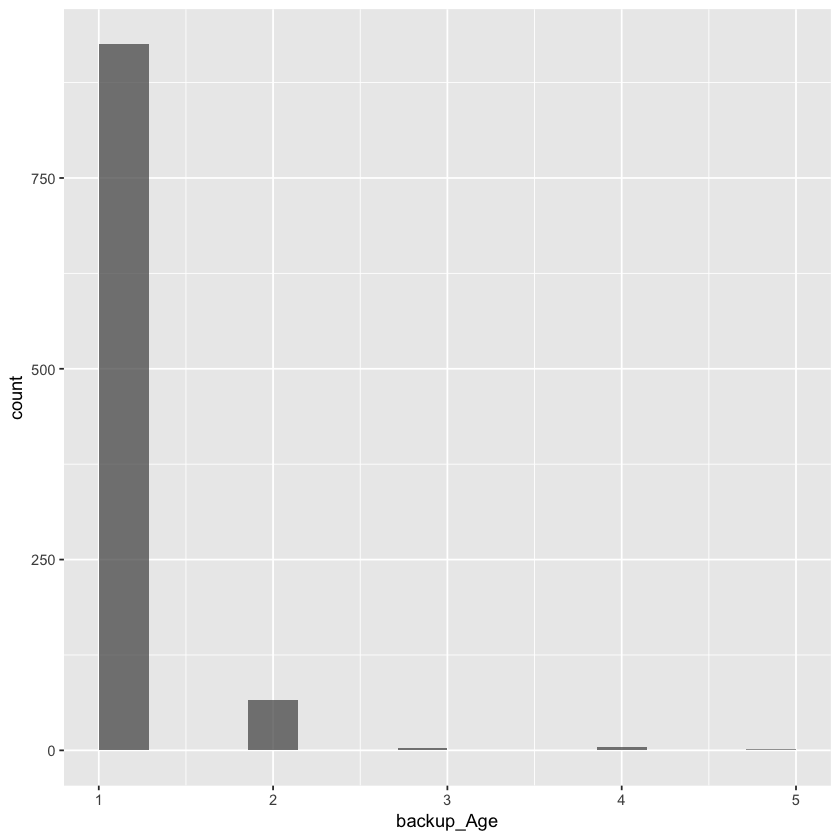

In [15]:
#c

data.frame(backup_Age) %>% group_by(backup_Age) %>% tally() %>% top_n(10)

ggplot(data = data.frame(backup_Age), aes(x = backup_Age, fill = backup_Age)) + 
        geom_histogram(bins = 15, alpha = .75)

(c)

We can see from the above chart that the lifetime distribution is heavily skewed to the left but is more densely populated and sloping upward as age increases. I think that this makes sense given the structure of the PMF, whereby the longer a hard drive lasts, the longer we can expect it to continue, from a probabilistic standpoint. Thus, I think that this histogram is indeed representative of both the lifetime and equilibrium distributions.

In [83]:
#d

Mean_Age <- mean(Age)
cat('Mean Age of X500:', baMean_Age)

Mean Age of X500: 316.597

(d)

I think that the mean is indeed greater than the lifetime distribution. This result makes sense if we consider that many of the chains seem to reach equilibrium. As such, they remain in this equilibrium state, which is why the histogram is more densely populated for greater and greater ages.